In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

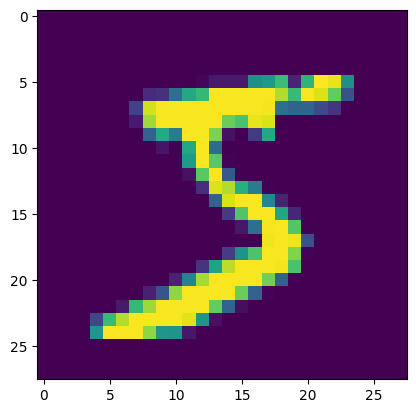

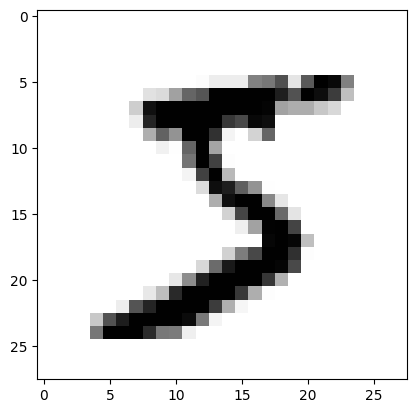

In [ ]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

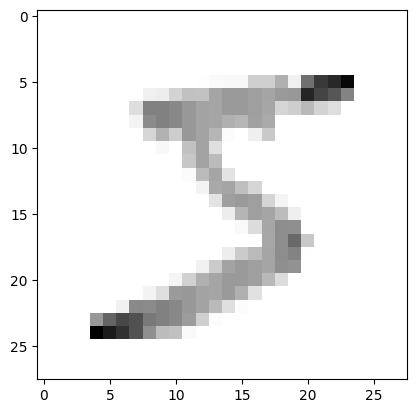

In [ ]:
x_train = tf.keras.utils.normalize(x_train,axis = 1)
s_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0])

5


In [ ]:
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training samples dimension",x_trainr.shape)
print("Testing samples dimension",x_testr.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


In [ ]:
model=Sequential()


In [ ]:
model.add(Conv2D(64, (3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [ ]:
print("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

model.fit(x_trainr,y_train,epochs=5,validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 76s 57ms/step - loss: 0.3164 - accuracy: 0.9015 - val_loss: 0.1355 - val_accuracy: 0.9573
Epoch 2/5
1313/1313 [==============================] - 74s 56ms/step - loss: 0.1049 - accuracy: 0.9678 - val_loss: 0.1025 - val_accuracy: 0.9688
Epoch 3/5
1313/1313 [==============================] - 74s 56ms/step - loss: 0.0752 - accuracy: 0.9767 - val_loss: 0.0689 - val_accuracy: 0.9792
Epoch 4/5
1313/1313 [==============================] - 72s 55ms/step - loss: 0.0590 - accuracy: 0.9823 - val_loss: 0.0650 - val_accuracy: 0.9806
Epoch 5/5
1313/1313 [==============================] - 81s 62ms/step - loss: 0.0489 - accuracy: 0.9848 - val_loss: 0.0618 - val_accuracy: 0.9811


In [ ]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples",test_loss)
print("Validation Accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 5s 16ms/step - loss: 105.2146 - accuracy: 0.9168
Test Loss on 10,000 test samples 105.2146224975586
Validation Accuracy on 10,000 test samples 0.9168000221252441


In [ ]:
predicions = model.predict([x_testr])

313/313 [==============================] - 4s 13ms/step


In [ ]:
print(np.argmax(predicions[0]))

7


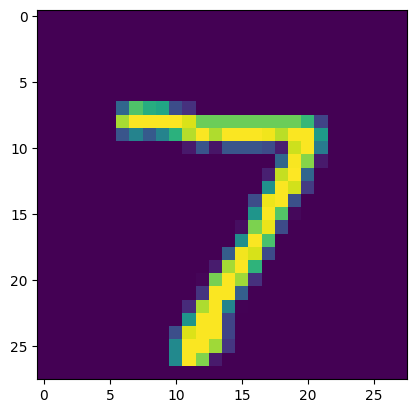

In [ ]:
plt.imshow(x_test[0])

In [ ]:
print(np.argmax(predicions[128]))

8


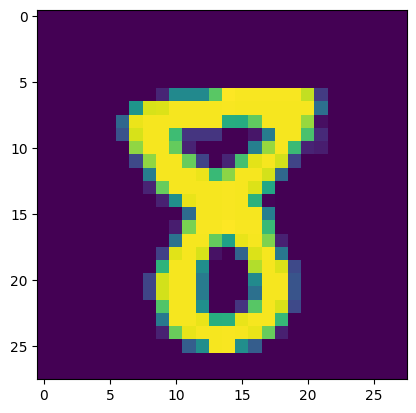

In [ ]:
plt.imshow(x_test[128])